### Задание 1
Нарисуйте график функции:
y(x) = k·cos(x – a) + b
для некоторых (2-3 различных) значений параметров k, a, b

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

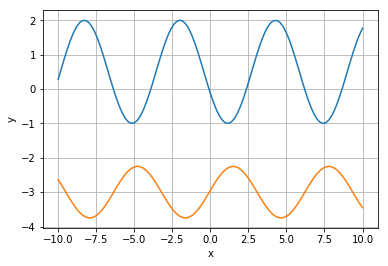

In [23]:
x = np.linspace(-10,10,101)

K = 1.5
a = -2
b = 0.5

plt.plot(x, K * np.cos(x - a) + b)

K = 0.75
a = 1.5
b = -3

plt.plot(x, K * np.cos(x - a) + b)

plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

### Задание 2 
Докажите, что при ортогональном преобразовании сохраняется расстояние между
точками.

True
True
True


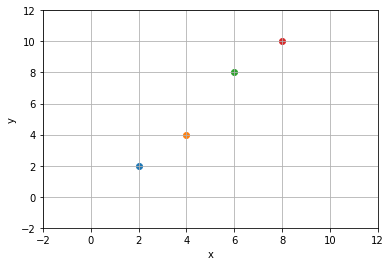

[ True]


In [66]:
#Задаем две точки на плоскости [x,y] и [x2,y2]
x = 2
y = x
x2 = 4
y2 = x2

#Производим ортогональное преобразование
a11, a12, a13 = 0, 1, 4
a21, a22, a23 = 1, 0, 6
X = a11*x + a12*y + a13
Y = a21*x + a22*y + a23
X2 = a11*x2 + a12*y2 + a13
Y2 = a21*x2 + a22*y2 + a23

#Проверяем условия, доказывающие, что преобразование ортогонально
print(a11**2 + a21**2 == 1)
print(a12**2 + a22**2 == 1)
print(a11*a12 + a21*a22 == 0)

#Строим графики оригинальных точек и точек после преобразования
plt.scatter(x, y)
plt.scatter(x2, y2)
plt.scatter(X, Y)
plt.scatter(X2, Y2)
plt.ylim(-2,12)
plt.xlim(-2,12)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

#Чтобы доказать, что после ортогонального преобразования сохраняется расстояние между точками, 
# необходимо посчитать длину вектора с координатами оригинальных точек
# и длину вектора с координатами точек после преобразования
a = np.array([x,y])
b = np.array([x2,y2])
c = b - a
length_c = np.sqrt([c[0]**2+c[1]**2])

A = np.array([X,Y])
B = np.array([X2,Y2])
C = B - A
length_C = np.sqrt([C[0]**2+C[1]**2])

# проверяем равенство длины векторов 
print(length_c == length_C)

### Задание 3
1) Напишите код, который будет переводить полярные координаты в декартовы.

2) Напишите код, который будет рисовать график окружности в полярных
координатах.

In [138]:
import math

#Полярные координаты
R = 2
a = 90

#Декартовы координаты
x = R*np.cos(math.radians(a))
y = R*np.sin(math.radians(a))

x,y

(1.2246467991473532e-16, 2.0)

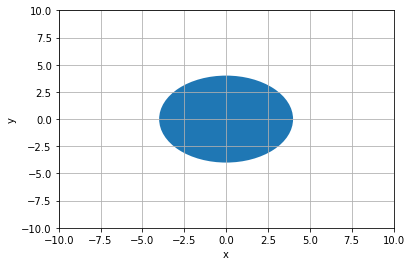

In [237]:
# Уравнение окружности  (x – a)**2 + (y – b)**2 = R**2
# Преобразую y = sqrt ( -(x-a)** 2 + R**2 ) + b
#Задаем полярные координаты
R = 4
alfa = 90
a = 0
b = 0

circle = plt.Circle(
    (R*np.cos(math.radians(alfa)), 
     np.sqrt( -(R*np.sin(math.radians(alfa))-a)**2 + R**2 ) + b), 
     R)
fig, ax = plt.subplots()
ax.add_artist(circle)
plt.ylim(-10,10)
plt.xlim(-10,10)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

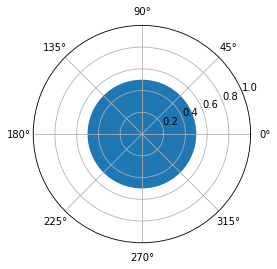

In [268]:
#Досмотрел видеоурок, понял, что, наверное, имелось ввиду другое, нашел такую реализацию, 
#сам не догадался как обойтись без subplot
ax = plt.subplot(polar=True)
circle = plt.Circle((0, 0), 0.5, transform=ax.transData._b)
ax.add_artist(circle)
plt.show()

### Задание 4
1) Решите систему уравнений:

y = x ^ 2 – 1

exp(x) + x·(1 – y) = 1

2) Решите систему уравнений и неравенств:

y = x ^ 2 – 1

exp(x) + x·(1 – y) > 1


In [273]:
from scipy.optimize import fsolve

def equations(p):
    x, y = p
    return (y - x ** 2 +1, np.exp(x) + x * (1 - y) - 1)
x1,y1 = fsolve(equations, (-1,1))

print(x1,y1)

-1.5818353528983808 1.502203083669976


C:\Users\HyperPC\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


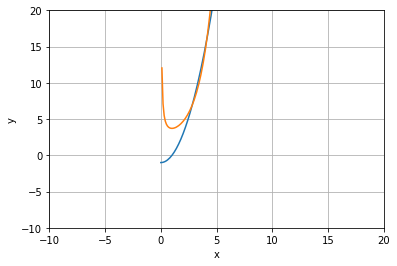

In [295]:
#Рисую график
x = np.linspace(0,20,201)
plt.plot(x, x**2 - 1)
plt.plot(x, ((np.exp(x))/x + 1))
plt.ylim(-10,20)
plt.xlim(-10,20)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

In [297]:
#Есть подозрение что нужно делать через модуль linprog, но я не могу понять,
#какой здесь целевой коэффициент для минимизации С
from scipy.optimize import linprog
#linprog(с - ???, A_ub - неравенство, b_ub - неравенство, A_eq - равенство, b_eq - равенство)